In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Data Loading

In [ ]:
# Load data
data_path = '/content/lung_cancer_data.csv'
lung_cancer_df = pd.read_csv(data_path)



**EDA**

In [ ]:
lung_cancer_df.head()

Patient_ID  Age  Gender Smoking_History  Tumor_Size_mm Tumor_Location  \
0  Patient0000   68    Male  Current Smoker      81.678677     Lower Lobe   
1  Patient0001   58    Male    Never Smoked      78.448272     Lower Lobe   
2  Patient0002   44    Male   Former Smoker      67.714305     Lower Lobe   
3  Patient0003   72    Male  Current Smoker      70.806008     Lower Lobe   
4  Patient0004   37  Female    Never Smoked      87.272433     Lower Lobe   

       Stage          Treatment  Survival_Months         Ethnicity  ...  \
0  Stage III            Surgery               44          Hispanic  ...   
1    Stage I  Radiation Therapy              101         Caucasian  ...   
2    Stage I       Chemotherapy               69  African American  ...   
3  Stage III       Chemotherapy               95  African American  ...   
4   Stage IV  Radiation Therapy              105             Asian  ...   

  Alanine_Aminotransferase_Level Aspartate_Aminotransferase_Level  \
0                      27.985571                        46.801214   
1                      30.120956                        39.711531   
2                       5.882418                        32.640602   
3                      38.908154                        44.319393   
4                      26.344877                        15.746906   

  Creatinine_Level   LDH_Level Calcium_Level Phosphorus_Level Glucose_Level  \
0         1.245849  239.240255     10.366307         3.547734    113.919243   
1         1.463231  233.515237     10.081731         2.945020    101.321578   
2         0.630109  169.037460      8.660892         4.637399     78.214177   
3         0.594342  213.967590      8.832669         3.617098    127.895361   
4         1.478239  118.187543      9.247609         4.773255    148.801185   

  Potassium_Level Sodium_Level  Smoking_Pack_Years  
0        4.968163   139.822861           17.006956  
1        3.896795   135.449361           93.270893  
2        4.369050   143.377155           70.348376  
3        4.348474   138.586005           19.828128  
4        3.671976   141.230724           81.047456  

[5 rows x 38 columns]

In [ ]:
lung_cancer_df['Stage'].unique()

array(['Stage III', 'Stage I', 'Stage IV', 'Stage II'], dtype=object)

In [ ]:
lung_cancer_df.isna().sum()

Patient_ID                          0
Age                                 0
Gender                              0
Smoking_History                     0
Tumor_Size_mm                       0
Tumor_Location                      0
Stage                               0
Treatment                           0
Survival_Months                     0
Ethnicity                           0
Insurance_Type                      0
Family_History                      0
Comorbidity_Diabetes                0
Comorbidity_Hypertension            0
Comorbidity_Heart_Disease           0
Comorbidity_Chronic_Lung_Disease    0
Comorbidity_Kidney_Disease          0
Comorbidity_Autoimmune_Disease      0
Comorbidity_Other                   0
Performance_Status                  0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Blood_Pressure_Pulse                0
Hemoglobin_Level                    0
White_Blood_Cell_Count              0
Platelet_Count                      0
Albumin_Leve

In [ ]:
lung_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        23658 non-null  object 
 1   Age                               23658 non-null  int64  
 2   Gender                            23658 non-null  object 
 3   Smoking_History                   23658 non-null  object 
 4   Tumor_Size_mm                     23658 non-null  float64
 5   Tumor_Location                    23658 non-null  object 
 6   Stage                             23658 non-null  object 
 7   Treatment                         23658 non-null  object 
 8   Survival_Months                   23658 non-null  int64  
 9   Ethnicity                         23658 non-null  object 
 10  Insurance_Type                    23658 non-null  object 
 11  Family_History                    23658 non-null  object 
 12  Como

In [ ]:
lung_cancer_df.describe().T

count        mean        std         min  \
Age                               23658.0   54.439344  14.396386   30.000000   
Tumor_Size_mm                     23658.0   55.383736  26.004354   10.004279   
Survival_Months                   23658.0   59.863809  34.246042    1.000000   
Performance_Status                23658.0    1.999915   1.413675    0.000000   
Blood_Pressure_Systolic           23658.0  134.462381  26.020492   90.000000   
Blood_Pressure_Diastolic          23658.0   84.475780  14.409826   60.000000   
Blood_Pressure_Pulse              23658.0   79.585299  11.546690   60.000000   
Hemoglobin_Level                  23658.0   14.000137   2.301411   10.000070   
White_Blood_Cell_Count            23658.0    6.735637   1.879292    3.501213   
Platelet_Count                    23658.0  299.867482  86.897568  150.017892   
Albumin_Level                     23658.0    3.998981   0.576931    3.000080   
Alkaline_Phosphatase_Level        23658.0   75.027604  25.936175   30.007235   
Alanine_Aminotransferase_Level    23658.0   22.504677  10.047864    5.001090   
Aspartate_Aminotransferase_Level  23658.0   30.133226  11.560915   10.000860   
Creatinine_Level                  23658.0    0.999459   0.287517    0.500001   
LDH_Level                         23658.0  174.734575  43.230997  100.002721   
Calcium_Level                     23658.0    9.261114   0.719875    8.000018   
Phosphorus_Level                  23658.0    3.742771   0.721708    2.500069   
Glucose_Level                     23658.0  109.895553  23.109136   70.000420   
Potassium_Level                   23658.0    4.245646   0.431968    3.500034   
Sodium_Level                      23658.0  140.028215   2.894568  135.000934   
Smoking_Pack_Years                23658.0   49.913594  28.870940    0.016800   

                                         25%         50%         75%  \
Age                                42.000000   54.000000   67.000000   
Tumor_Size_mm                      32.972797   55.296297   78.190014   
Survival_Months                    30.000000   60.000000   89.000000   
Performance_Status                  1.000000    2.000000    3.000000   
Blood_Pressure_Systolic           112.000000  134.000000  157.000000   
Blood_Pressure_Diastolic           72.000000   85.000000   97.000000   
Blood_Pressure_Pulse               70.000000   80.000000   90.000000   
Hemoglobin_Level                   11.990625   13.983383   15.999260   
White_Blood_Cell_Count              5.108723    6.729774    8.353701   
Platelet_Count                    224.884576  299.933443  375.437029   
Albumin_Level                       3.504579    3.999931    4.499102   
Alkaline_Phosphatase_Level         52.624860   75.089745   97.453941   
Alanine_Aminotransferase_Level     13.816180   22.547943   31.092935   
Aspartate_Aminotransferase_Level   20.065339   30.271772   40.107488   
Creatinine_Level                    0.748845    1.001183    1.249173   
LDH_Level                         137.444977  174.390634  212.228273   
Calcium_Level                       8.640877    9.259304    9.883248   
Phosphorus_Level                    3.120107    3.730837    4.364422   
Glucose_Level                      89.828616  109.949488  130.061977   
Potassium_Level                     3.871842    4.242236    4.618318   
Sodium_Level                      137.540078  140.002209  142.541883   
Smoking_Pack_Years                 25.026793   49.926220   74.924580   

                                         max  
Age                                79.000000  
Tumor_Size_mm                      99.990554  
Survival_Months                   119.000000  
Performance_Status                  4.000000  
Blood_Pressure_Systolic           179.000000  
Blood_Pressure_Diastolic          109.000000  
Blood_Pressure_Pulse               99.000000  
Hemoglobin_Level                   17.999957  
White_Blood_Cell_Count              9.999535  
Platelet_Count                    449.974734  
Albumin_Level        

In [ ]:
# Create the target variable (1 if survival months > 12, else 0)
lung_cancer_df['Survival_Status'] = lung_cancer_df['Survival_Months'].apply(lambda x: 1 if x > 12 else 0)

# Drop irrelevant columns
lung_cancer_df.drop(['Patient_ID', 'Survival_Months'], axis=1, inplace=True)




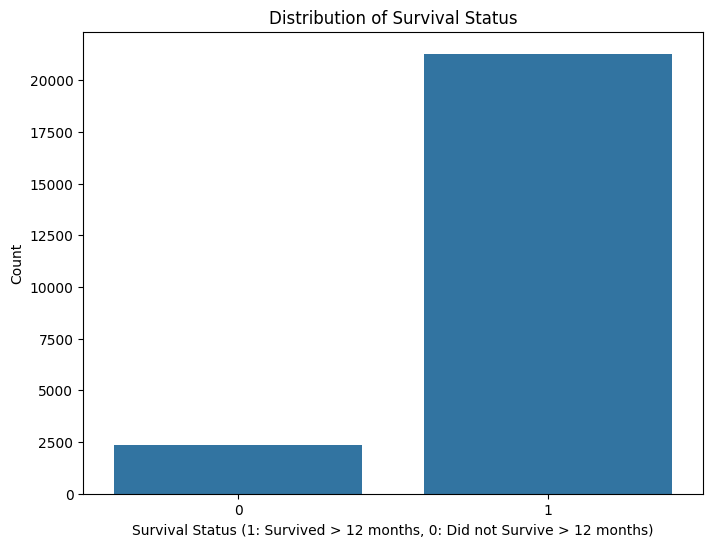

In [ ]:
# Plot the distribution of survival status
plt.figure(figsize=(8, 6))
sns.countplot(x='Survival_Status', data=lung_cancer_df)
plt.title('Distribution of Survival Status')
plt.xlabel('Survival Status (1: Survived > 12 months, 0: Did not Survive > 12 months)')
plt.ylabel('Count')
plt.show()


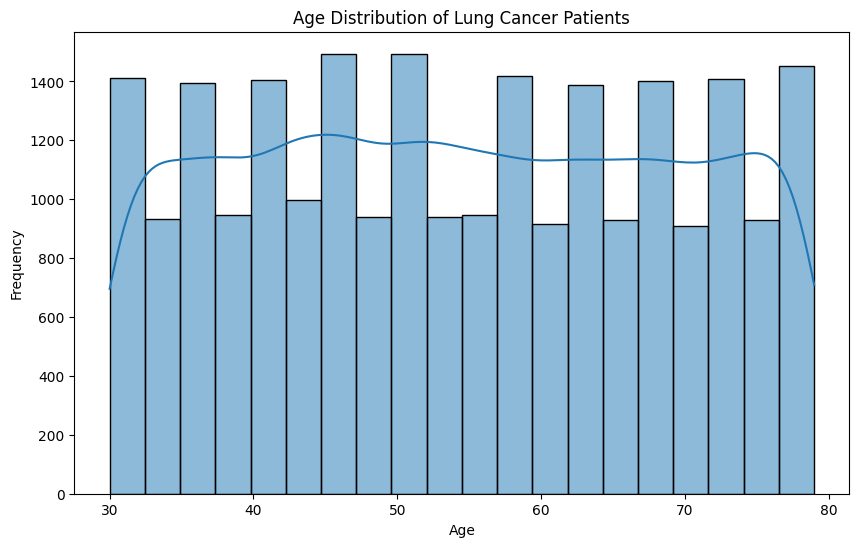

In [ ]:
# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(lung_cancer_df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Lung Cancer Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


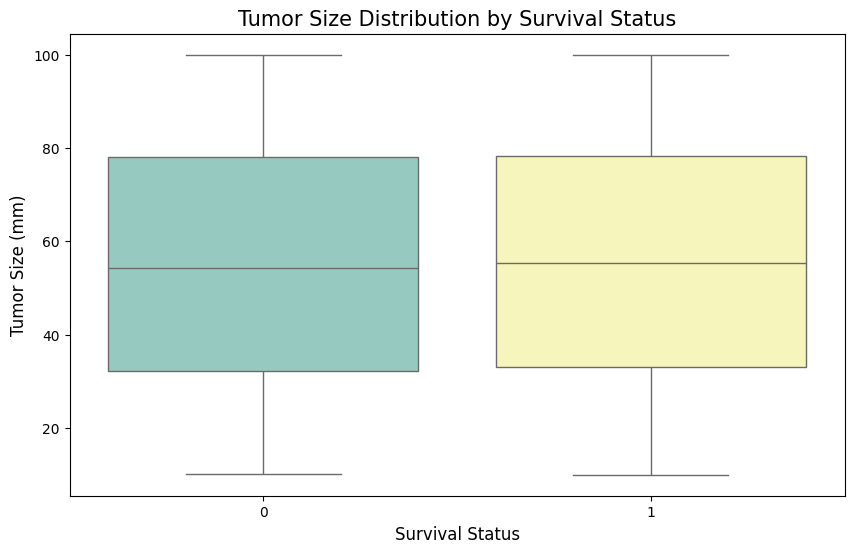

In [ ]:
# Plot the distribution of Tumor Size by Survival Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survival_Status', y='Tumor_Size_mm', data=lung_cancer_df, palette='Set3')
plt.title('Tumor Size Distribution by Survival Status', fontsize=15)
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Tumor Size (mm)', fontsize=12)
plt.show()


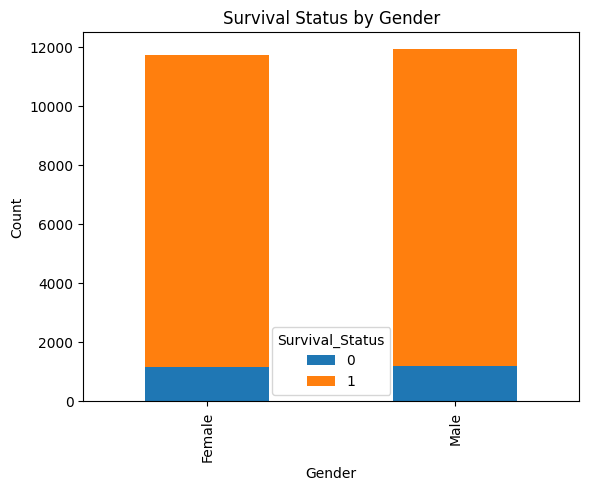

In [ ]:
gender_survival = lung_cancer_df.groupby(['Gender', 'Survival_Status']).size().unstack()
gender_survival.plot(kind='bar', stacked=True)
plt.title('Survival Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


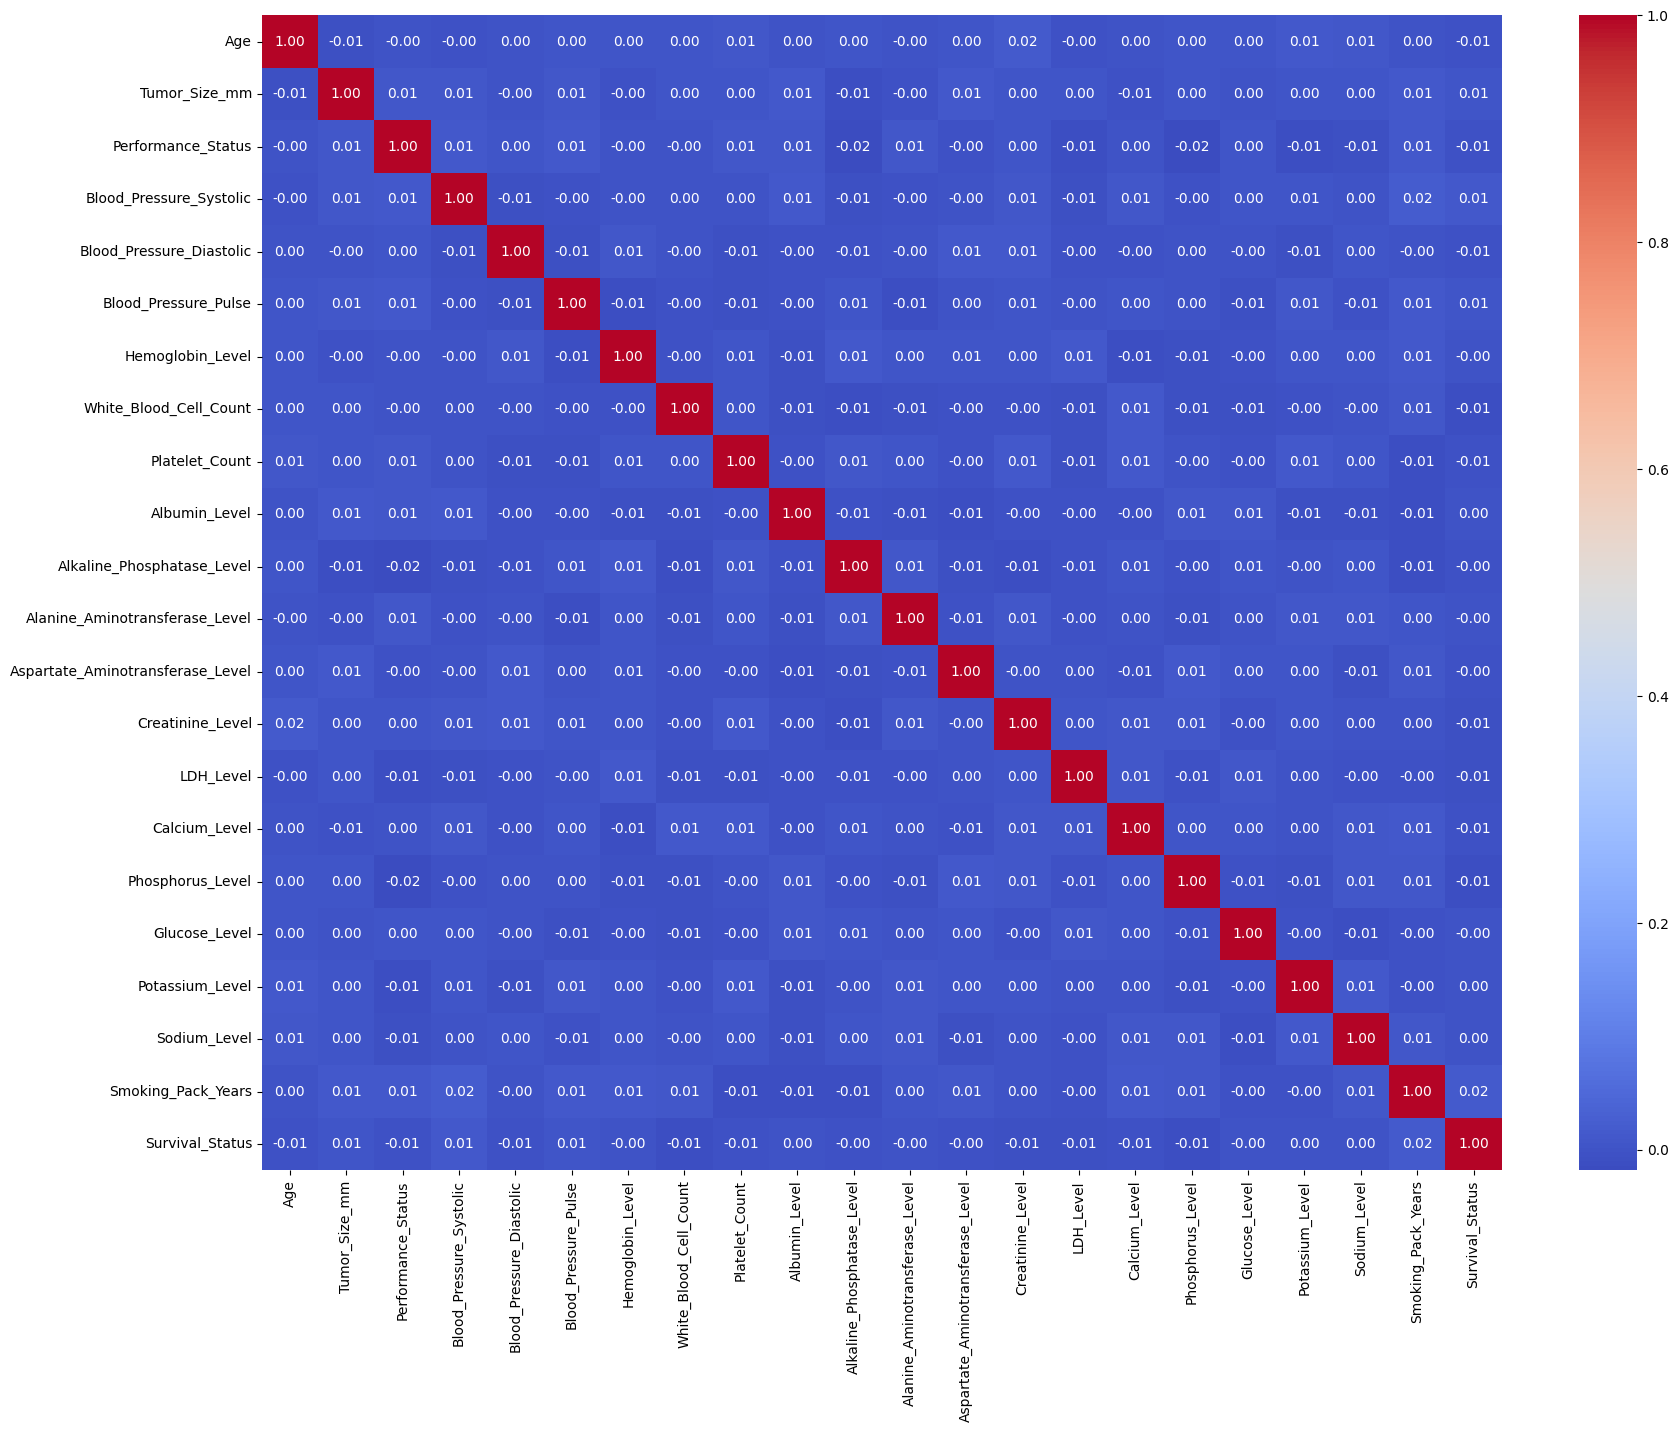

In [ ]:
correlation_matrix = lung_cancer_df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Data Preparation and Modelling

In [ ]:
# Encode categorical variables
categorical_cols = lung_cancer_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    lung_cancer_df[col] = le.fit_transform(lung_cancer_df[col])

# Separate features and target variable
X = lung_cancer_df.drop('Survival_Status', axis=1)
y = lung_cancer_df['Survival_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Voting Classifier

In [ ]:
# Define base models
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('rf', rf_clf)],
    voting='hard'
)

# Train and evaluate the voting classifier
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")


Voting Classifier Accuracy: 0.8990


##Stacking Classifier

In [ ]:
# Define base models and the meta-model
base_learners = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())
]
meta_learner = GradientBoostingClassifier()

# Create a stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner
)

# Train and evaluate the stacking classifier
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.4f}")


Stacking Classifier Accuracy: 0.8988


##Blending

In [ ]:
# Split training data for blending
X_blend_train, X_blend_val, y_blend_train, y_blend_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train base models on blending training data
blending_clf_1 = LogisticRegression().fit(X_blend_train, y_blend_train)
blending_clf_2 = DecisionTreeClassifier().fit(X_blend_train, y_blend_train)
blending_clf_3 = RandomForestClassifier().fit(X_blend_train, y_blend_train)

# Predict on blending validation data
blend_val_preds = np.column_stack([
    blending_clf_1.predict(X_blend_val),
    blending_clf_2.predict(X_blend_val),
    blending_clf_3.predict(X_blend_val)
])

# Train meta-model on blending validation predictions
blending_meta_clf = GradientBoostingClassifier().fit(blend_val_preds, y_blend_val)

# Predict on test data
blend_test_preds = np.column_stack([
    blending_clf_1.predict(X_test),
    blending_clf_2.predict(X_test),
    blending_clf_3.predict(X_test)
])
blending_pred = blending_meta_clf.predict(blend_test_preds)
blending_accuracy = accuracy_score(y_test, blending_pred)
print(f"Blending Accuracy: {blending_accuracy:.4f}")


Blending Accuracy: 0.8990


##Comparison Table

In [ ]:
# Create a comparison table of accuracies
accuracy_comparison = pd.DataFrame({
    'Model': ['Voting Classifier', 'Stacking Classifier', 'Blending'],
    'Accuracy': [voting_accuracy, stacking_accuracy, blending_accuracy]
})

print(accuracy_comparison)


                 Model  Accuracy
0    Voting Classifier  0.898986
1  Stacking Classifier  0.898774
2             Blending  0.898986


In [ ]:
accuracy_comparison.T

0                    1         2
Model     Voting Classifier  Stacking Classifier  Blending
Accuracy           0.898986             0.898774  0.898986

#Unsupervised Learning

##Clustering Patients Based on Health and Treatment Features



In [ ]:
# Select relevant features
features = [
    'Age', 'Tumor_Size_mm', 'Performance_Status',
    'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse',
    'Hemoglobin_Level', 'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level',
    'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level',
    'Creatinine_Level', 'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level',
    'Potassium_Level', 'Sodium_Level'
]

# Handle missing values (if any)
lung_cancer_df = lung_cancer_df.dropna(subset=features)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(lung_cancer_df[features])

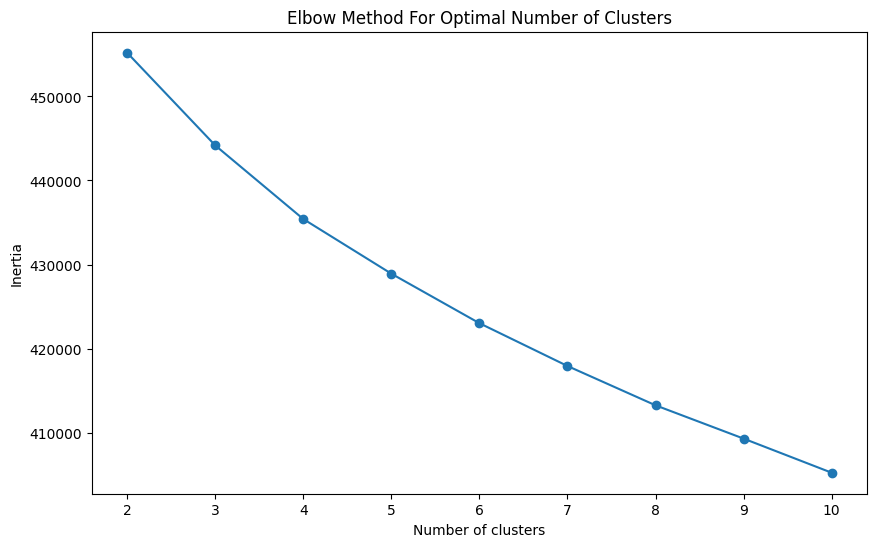

In [ ]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Silhouette Score: 0.03294501320423403


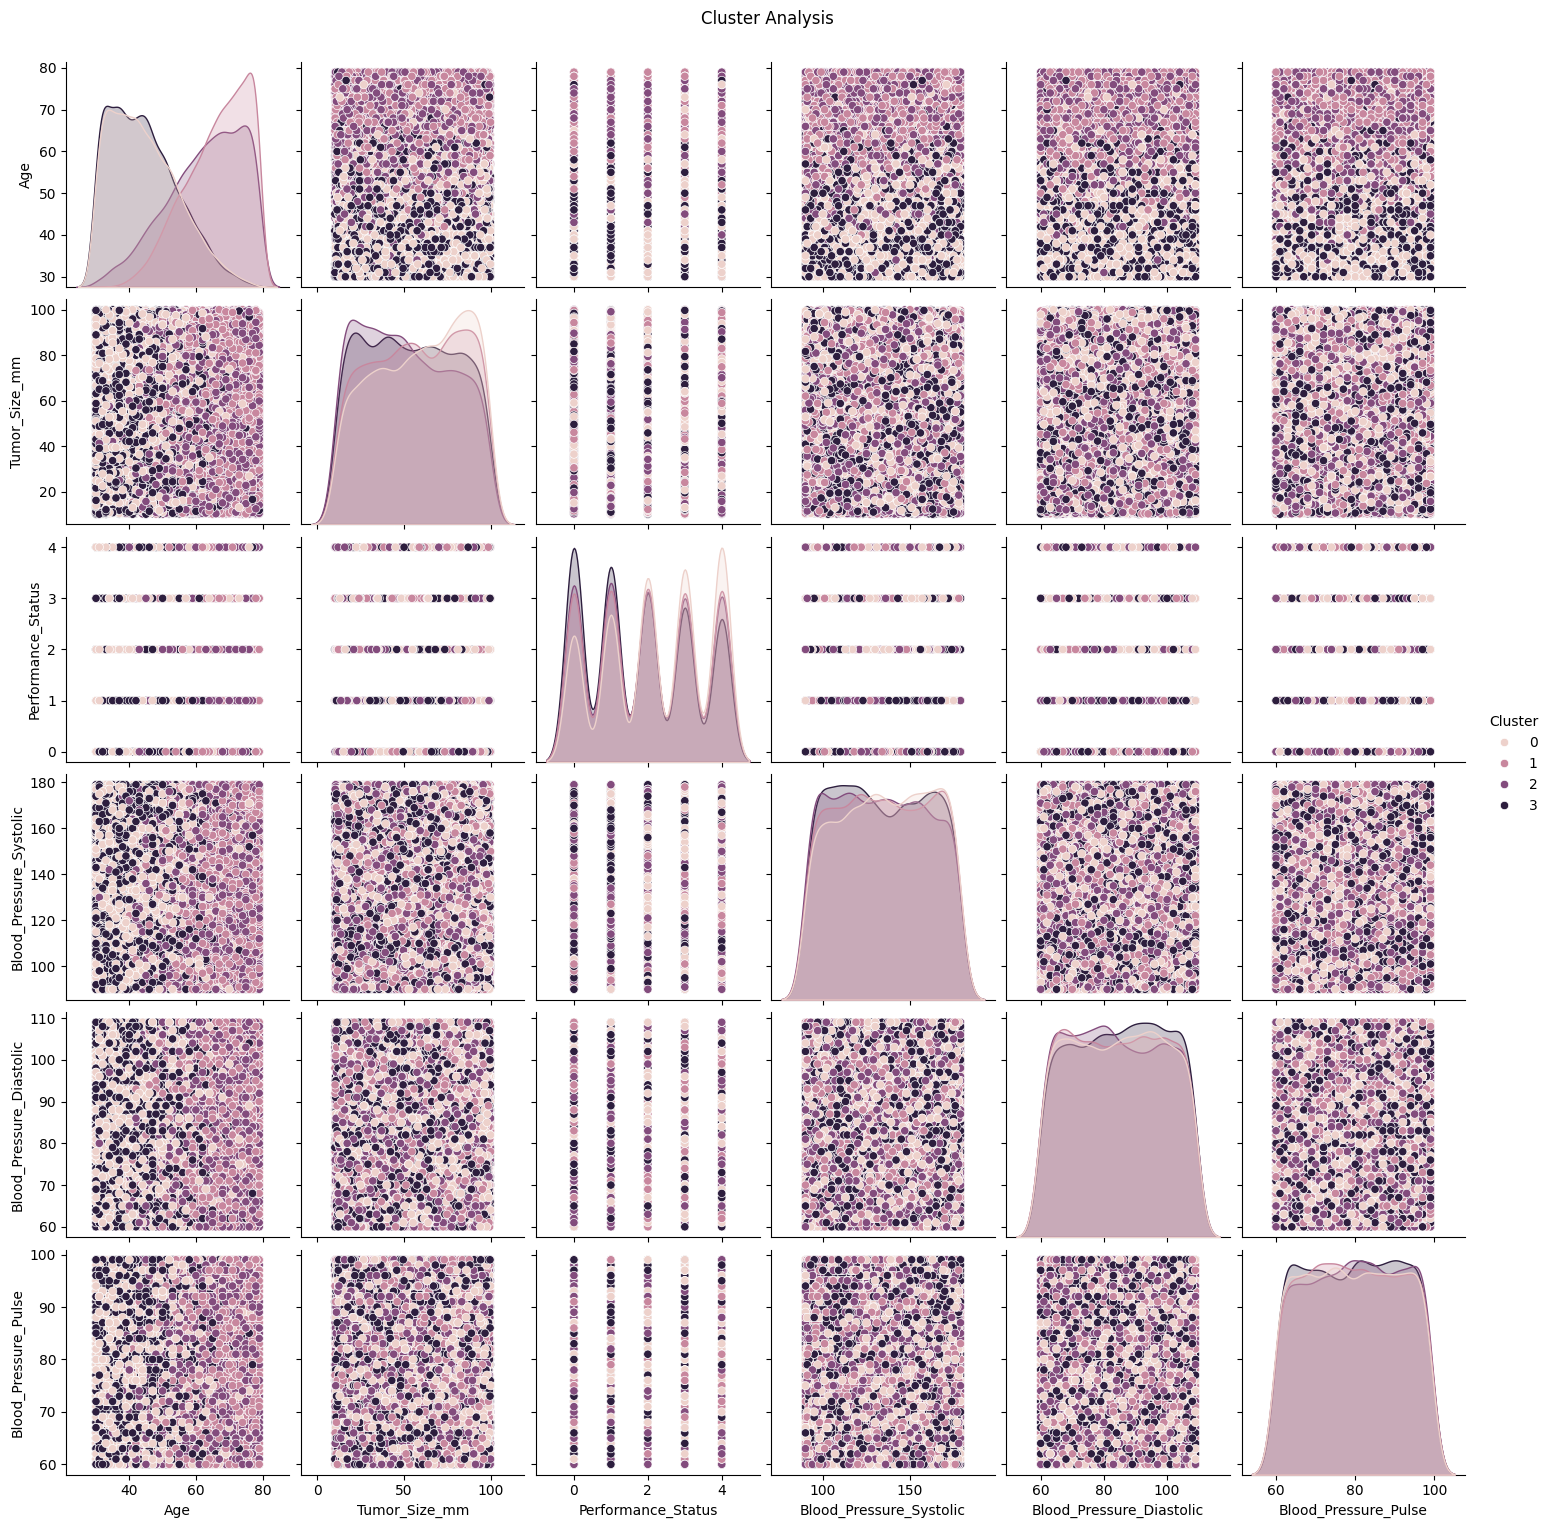

In [ ]:
# Choose the optimal number of clusters based on the Elbow plot
optimal_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
lung_cancer_df['Cluster'] = kmeans.fit_predict(X)

# Evaluate the clusters using silhouette score
score = silhouette_score(X, lung_cancer_df['Cluster'])
print(f'Silhouette Score: {score}')

# Analyze the characteristics of each cluster
sns.pairplot(lung_cancer_df, hue='Cluster', vars=features[:6])  # Pairplot of first 6 features
plt.suptitle('Cluster Analysis', y=1.02)
plt.show()

Silhouette Score after PCA: 0.31028890397063935


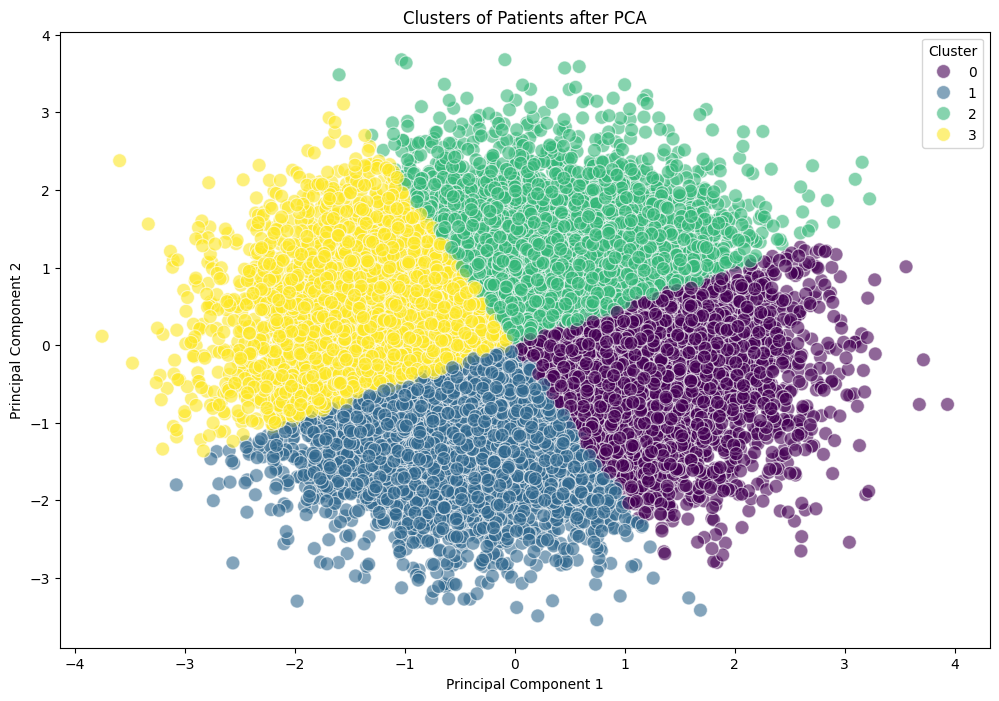

In [ ]:
from sklearn.decomposition import PCA

# Standardize the data again
scaler = StandardScaler()
X = scaler.fit_transform(lung_cancer_df[features])

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)
lung_cancer_df['Cluster_PCA'] = kmeans_pca.fit_predict(X_pca)

# Evaluate the clusters using silhouette score
score_pca = silhouette_score(X_pca, lung_cancer_df['Cluster_PCA'])
print(f'Silhouette Score after PCA: {score_pca}')

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=lung_cancer_df['Cluster_PCA'], palette="viridis", s=100, alpha=0.6)
plt.title('Clusters of Patients after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


#Hypertuning K-means

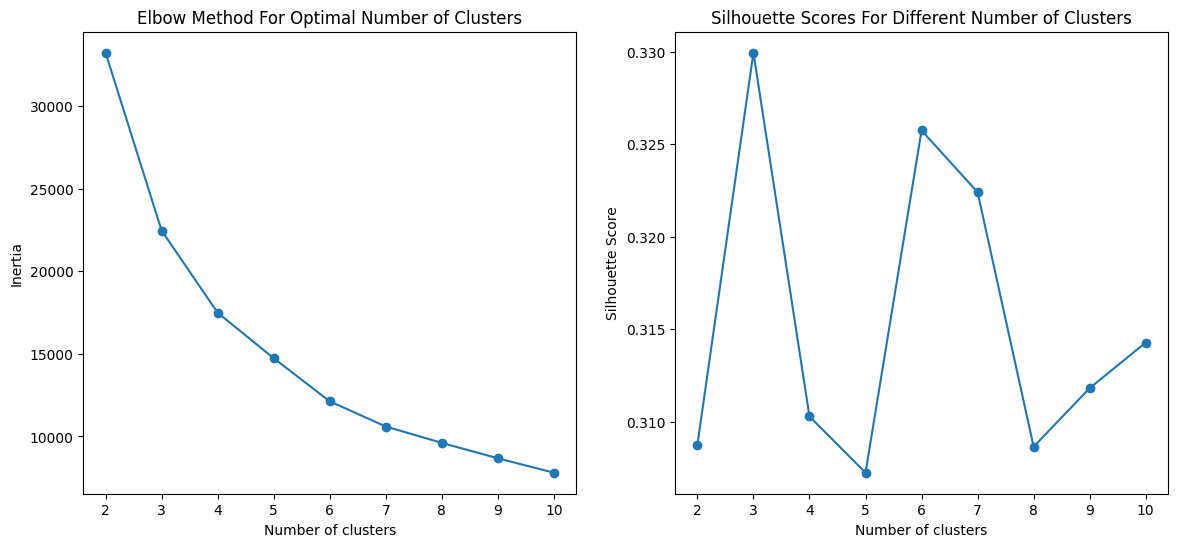

In [ ]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)
for n in cluster_range:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores For Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()



Best number of clusters based on silhouette score: 3


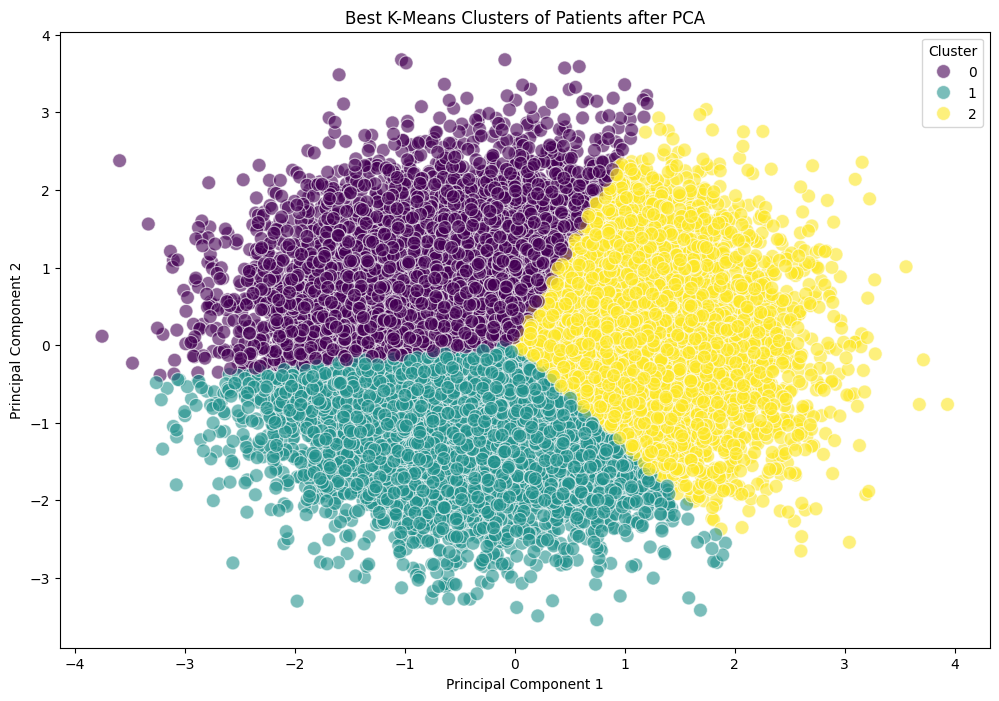

In [ ]:
# Based on the silhouette scores, choose the best number of clusters
best_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f'Best number of clusters based on silhouette score: {best_clusters}')

# Apply K-Means with the best number of clusters
kmeans_best = KMeans(n_clusters=best_clusters, random_state=42)
lung_cancer_df['Cluster_Best'] = kmeans_best.fit_predict(X_pca)

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=lung_cancer_df['Cluster_Best'], palette="viridis", s=100, alpha=0.6)
plt.title('Best K-Means Clusters of Patients after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Calculate the cluster centroids in the original feature space
centroids = kmeans_best.cluster_centers_
centroids_original_space = pca.inverse_transform(centroids)

# Get the feature names (assuming 'features' was originally a list of feature names)
feature_names = features

# Create a DataFrame for the centroids
centroids_df = pd.DataFrame(centroids_original_space, columns=feature_names) # Use feature_names instead of features.columns
centroids_df['Cluster'] = range(best_clusters)
centroids_df

Age  Tumor_Size_mm  Performance_Status  Blood_Pressure_Systolic  \
0 -0.183930       0.233913            0.001151                 0.232658   
1 -0.160995      -0.112692            0.196901                -0.273903   
2  0.337674      -0.117636           -0.194528                 0.041938   

   Blood_Pressure_Diastolic  Blood_Pressure_Pulse  Hemoglobin_Level  \
0                 -0.320318              0.247457         -0.396160   
1                  0.325129             -0.172468          0.158696   
2                 -0.006688             -0.072141          0.230820   

   White_Blood_Cell_Count  Platelet_Count  Albumin_Level  ...  \
0                0.299255       -0.203950       0.313407  ...   
1               -0.360815       -0.147126       0.016560  ...   
2                0.062300        0.343593      -0.322188  ...   

   Alanine_Aminotransferase_Level  Aspartate_Aminotransferase_Level  \
0                       -0.526295                         -0.039898   
1                        0.298054                         -0.004665   
2                        0.220963                          0.043528   

   Creatinine_Level  LDH_Level  Calcium_Level  Phosphorus_Level  \
0         -0.016184   0.105150       0.091521          0.068519   
1         -0.235631   0.018818      -0.332680         -0.241708   
2          0.247244  -0.121123       0.237439          0.170534   

   Glucose_Level  Potassium_Level  Sodium_Level  Cluster  
0       0.079482        -0.006599     -0.090258        0  
1       0.240910        -0.316723     -0.392503        1  
2      -0.314216         0.317540      0.473636        2  

[3 rows x 21 columns]

In [ ]:
# Add cluster labels to the original dataframe
lung_cancer_df['Cluster'] = kmeans_best.labels_

# Group by cluster and calculate the mean values of the features
cluster_summary = lung_cancer_df.groupby('Cluster').mean()
cluster_summary


Age    Gender  Smoking_History  Tumor_Size_mm  Tumor_Location  \
Cluster                                                                        
0        51.972088  0.499618         1.004206      61.293440        1.012745   
1        52.110827  0.509012         1.004218      52.617190        1.003068   
2        59.142571  0.503442         0.987983      52.288875        0.997997   

            Stage  Treatment  Ethnicity  Insurance_Type  Family_History  ...  \
Cluster                                                                  ...   
0        1.500510   1.481902   2.009432        1.495284        0.488912  ...   
1        1.505688   1.503643   1.996676        1.506839        0.498146  ...   
2        1.520215   1.489548   1.978345        1.490550        0.487045  ...   

          LDH_Level  Calcium_Level  Phosphorus_Level  Glucose_Level  \
Cluster                                                               
0        179.022301       9.330556          3.793389     111.804343   
1        175.723845       9.015829          3.571761     115.324481   
2        169.554883       9.433102          3.860517     102.704808   

         Potassium_Level  Sodium_Level  Smoking_Pack_Years  Survival_Status  \
Cluster                                                                       
0               4.242973    139.752921           50.192887         0.901861   
1               4.110704    138.845721           49.433349         0.898888   
2               4.380408    141.456506           50.109567         0.898861   

         Cluster_PCA  Cluster_Best  
Cluster                             
0           2.614963           0.0  
1           1.214112           1.0  
2           0.676555           2.0  

[3 rows x 39 columns]

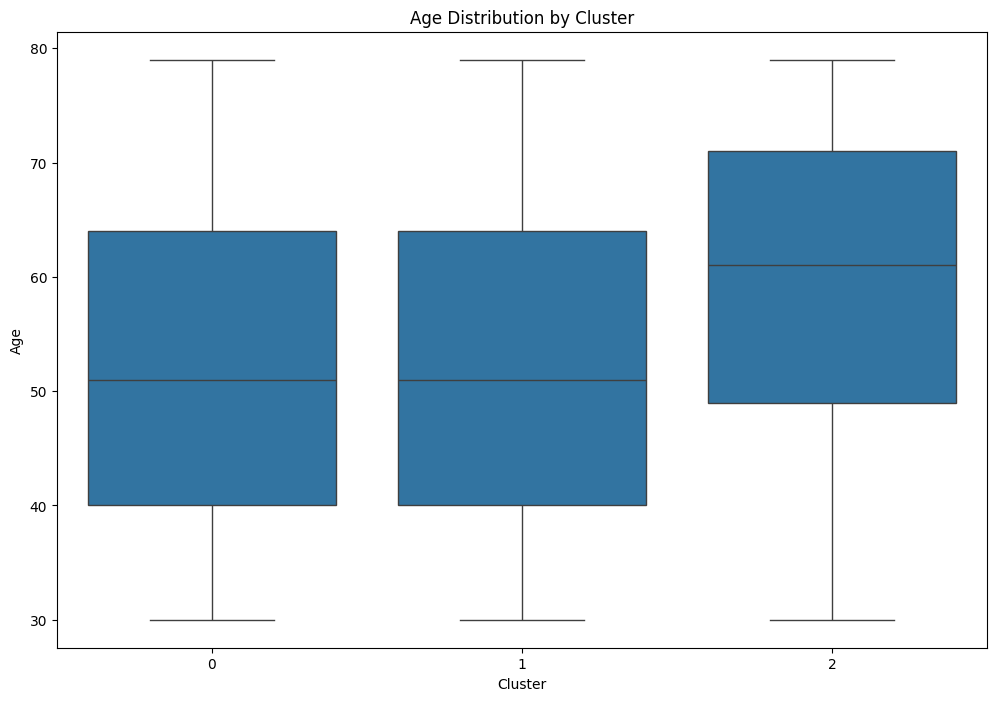

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Age', data=lung_cancer_df)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


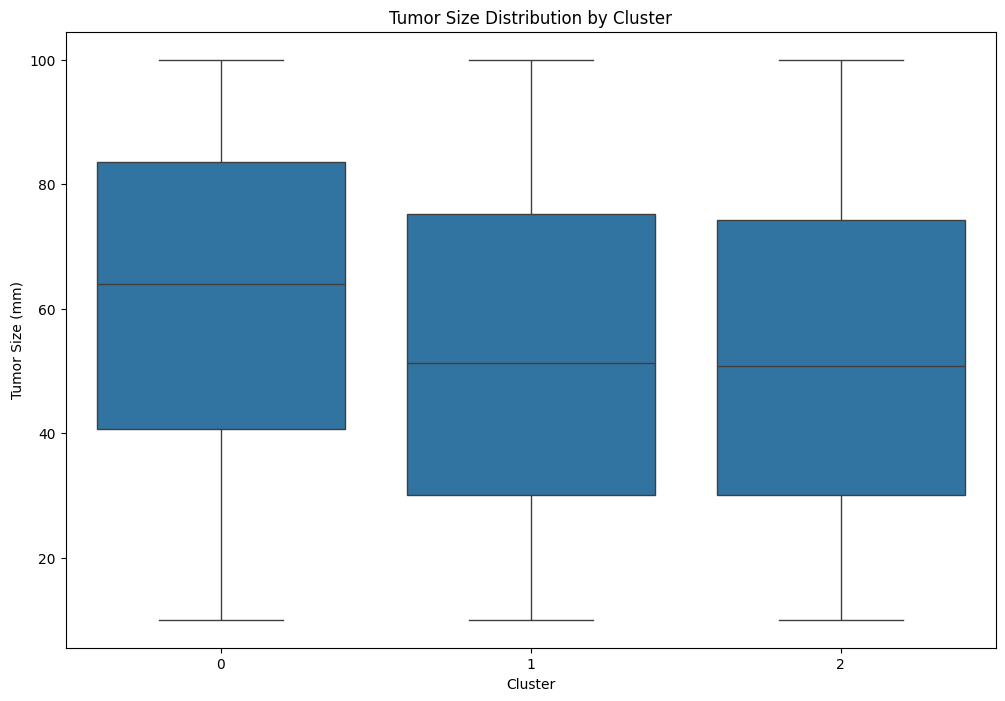

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Tumor_Size_mm', data=lung_cancer_df)
plt.title('Tumor Size Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tumor Size (mm)')
plt.show()
